In [1]:
import numpy as np
from collections import defaultdict
import random
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tokenizers import Tokenizer
import numpy as np
import random
from collections import defaultdict
from tqdm import tqdm  # 导入 tqdm
# 自定义分词器
import re
from collections import defaultdict



In [2]:

class SimpleWord2Vec:
    def __init__(self, corpus, vector_size=100, window=5, min_count=1):
        neg_sample_size = 20
        self.neg_sample_size = neg_sample_size
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.word_count = defaultdict(int)
        self.corpus = corpus
        self.vocab = []
        self.word_vectors = {}

        self._build_vocab()
        self._initialize_vectors()
        self._train()

    def _build_vocab(self):
        for sentence in self.corpus:
            for word in sentence.split():
                self.word_count[word] += 1
        self.vocab = [word for word in self.word_count if self.word_count[word] >= self.min_count]
        print("Vocabulary size:", len(self.vocab))

    def _initialize_vectors(self):
        for word in self.vocab:
            self.word_vectors[word] = np.random.rand(self.vector_size)

    def _train(self):
        # 使用 tqdm 创建进度条，设置 total 为语料的句子数量
        for sentence in tqdm(self.corpus, desc="Training Progress", unit="sentence"):
            words = sentence.split()
            for i, word in enumerate(words):
                if word not in self.word_vectors:
                    continue
                start = max(0, i - self.window)
                end = min(len(words), i + self.window + 1)
                context = [words[j] for j in range(start, end) if j != i]

                neg_samples = self._get_neg_samples(word)  # 获取负样本

                for context_word in context:
                    if context_word in self.word_vectors:
                        similarity = np.dot(self.word_vectors[word], self.word_vectors[context_word])
                        self.word_vectors[word] += 0.01 * (1 - similarity) * self.word_vectors[context_word]
                        self.word_vectors[context_word] += 0.01 * (1 - similarity) * self.word_vectors[word]

                for neg_sample in neg_samples:
                    if neg_sample in self.word_vectors:
                        neg_similarity = np.dot(self.word_vectors[word], self.word_vectors[neg_sample])
                        self.word_vectors[word] -= 0.01 * neg_similarity * self.word_vectors[neg_sample]
                        self.word_vectors[neg_sample] -= 0.01 * neg_similarity * self.word_vectors[word]

    def _get_neg_samples(self, word):
        neg_samples = []
        while len(neg_samples) < self.neg_sample_size:
            sample = random.choice(self.vocab)
            if sample != word:
                neg_samples.append(sample)
        return neg_samples


In [3]:

class SimpleFrequencyTokenizer:
    def __init__(self, n=3):  # 默认 n-gram 的大小为 2
        self.n = n
        self.ngram_freq = defaultdict(int)

    def build_ngram_frequency(self, text):
        # 统计 n-gram 的频率
        for i in range(len(text) - self.n + 1):
            ngram = text[i:i + self.n]
            self.ngram_freq[ngram] += 1

    def tokenize(self, text):
        # 将文本转换为小写以确保一致性
        text = text.lower()

        # 先构建 n-gram 的频率
        self.build_ngram_frequency(text)

        tokens = []
        i = 0
        while i < len(text):
            # 找到最大频率的 n-gram 进行切分
            if i + self.n <= len(text):
                # 获取当前 n-gram
                current_ngram = text[i:i + self.n]
                if current_ngram in self.ngram_freq:
                    # 找到最大频率的 n-gram，若不存在则单字分词
                    tokens.append(current_ngram)
                    i += self.n  # 跳过 n-gram
                else:
                    tokens.append(text[i])  # 若没有匹配，按单字添加
                    i += 1
            else:
                tokens.append(text[i])
                i += 1
        print(tokens)
        return tokens


# 示例使用：

In [4]:
corpus = []
with open("data.txt", "r", encoding="utf-8") as file:
    for line in file:
        corpus.append(line.strip()) 

# 2. 使用自定义分词器
tokenizer = SimpleFrequencyTokenizer(n=3)
tokenized_corpus = [" ".join(tokenizer.tokenize(sentence)) for sentence in corpus]

[]
['# m', 'oon', 'sto', 'ne ', 'bea', 'c', 'h']
[]
['###', ' th', 'e m', 'ain', ' st', 'ree', 't m', 'erc', 'han', 'ts,', ' bo', 'ok ', '1']
[]
['## ', 'lin', 'da ', 'see', 'd']
[]
['###', ' co', 'nte', 'nts']
[]
['get', ' a ', 'lin', 'da ', 'see', 'd s', 'hor', 't s', 'tor', 'y f', 'ree']
[]
['by ', 'lin', 'da ', 'see', 'd']
[]
['ded', 'ica', 'tio', 'n']
[]
['cha', 'pte', 'r 1']
[]
['cha', 'pte', 'r 2']
[]
['cha', 'pte', 'r 3']
[]
['cha', 'pte', 'r 4']
[]
['cha', 'pte', 'r 5']
[]
['cha', 'pte', 'r 6']
[]
['cha', 'pte', 'r 7']
[]
['cha', 'pte', 'r 8']
[]
['cha', 'pte', 'r 9']
[]
['cha', 'pte', 'r 1', '0']
[]
['cha', 'pte', 'r 1', '1']
[]
['cha', 'pte', 'r 1', '2']
[]
['cha', 'pte', 'r 1', '3']
[]
['cha', 'pte', 'r 1', '4']
[]
['cha', 'pte', 'r 1', '5']
[]
['cha', 'pte', 'r 1', '6']
[]
['cha', 'pte', 'r 1', '7']
[]
['cha', 'pte', 'r 1', '8']
[]
['cha', 'pte', 'r 1', '9']
[]
['cha', 'pte', 'r 2', '0']
[]
['cha', 'pte', 'r 2', '1']
[]
['cha', 'pte', 'r 2', '2']
[]
['cha', 'pte', 'r 2', '

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [15]:
simple_w2v = SimpleWord2Vec(corpus)

# 4. 可视化词嵌入 
words = list(simple_w2v.word_vectors.keys())
word_vectors = np.array([simple_w2v.word_vectors[word] for word in words])

Vocabulary size: 93159


Training Progress: 100%|██████████| 102807/102807 [04:02<00:00, 423.16sentence/s]


In [16]:

# 5. 使用 t-SNE 降维并可视化
perplexity_value  = min(5, len(simple_w2v.vocab) - 1)  # 确保perplexity小于词汇量 - 1
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
X_tsne = tsne.fit_transform(word_vectors)



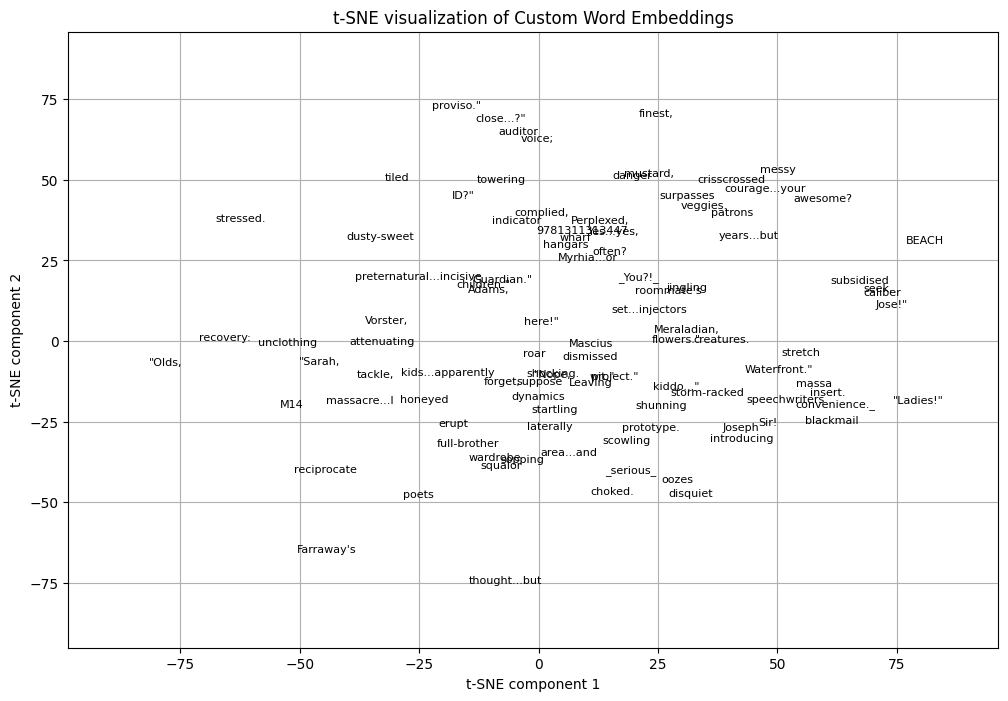

In [17]:
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], marker='.', alpha=0.0)  # 散点可视化

# 随机选择标注的词
num_to_annotate = 100  # 要标注的词数
indices = random.sample(range(len(words)), min (num_to_annotate, len(words)))

# 添加标注
for i in indices:
    plt.annotate(words[i], (X_tsne[i, 0], X_tsne[i, 1]), fontsize=8)

plt.title("t-SNE visualization of Custom Word Embeddings")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.grid()
plt.show()



## 4. More to Explore[10 points]

  由于numpy手动实现的分词的逻辑和embeding生成的逻辑简单，导致生成的效果不好，和调用官方的库的效果相差甚远，还有待优化